<a href="https://colab.research.google.com/github/santhoshreddy39/Ineuron-ML-DL-Solutions/blob/master/Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imported the neccessary libraries

In [1]:
pip install scikit-plot

In [2]:
# Data analysis and wrangling
import pandas as pd    # File read & write operation
import numpy as np     # Linear algebra

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

# Machine Learning 
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import scikitplot.metrics as skplt
import pydotplus
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url) 
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Finding the shape of data i.e. number of rows & columns
print('Shape of the_data:',titanic.shape)

Shape of the_data: (891, 12)


In [5]:
# Checking the column names
print(titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'E mbarked']


Using only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived or not.

In [6]:
# Removing the unwanted columns from the dataframe
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','E mbarked'],axis=1,inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [7]:
# Trained data information
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
None


In [8]:
# Missing values in trained data
print(titanic.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


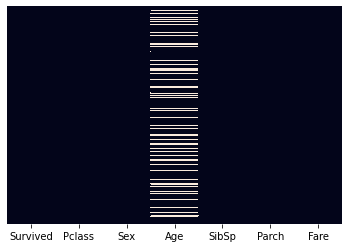

In [9]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

There are missing values in Age feature: <br>
- Age      : 177

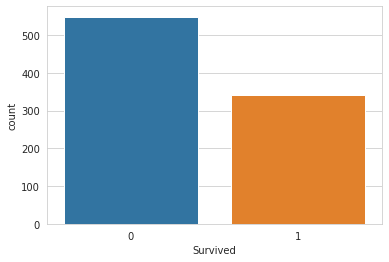

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

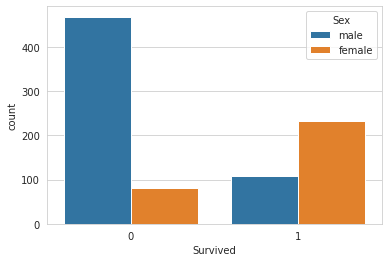

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic)

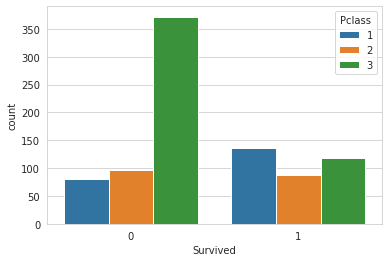

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [13]:
titanic[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
titanic[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


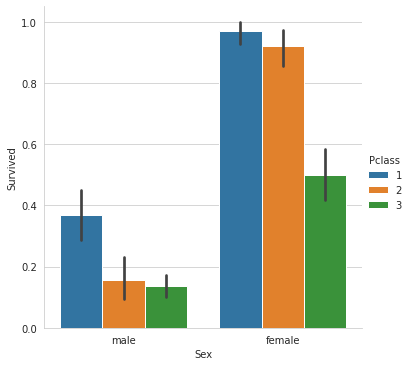

In [15]:
sns.catplot(x='Sex',y='Survived',hue='Pclass', kind='bar',data=titanic)

In [16]:
titanic[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
titanic[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


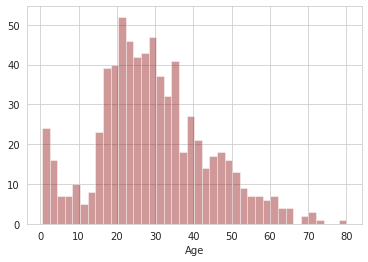

In [18]:
sns.distplot(titanic['Age'].dropna(),kde=False,bins=40,color='darkred')

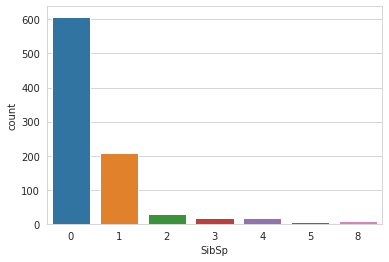

In [19]:
sns.countplot(x='SibSp',data=titanic)

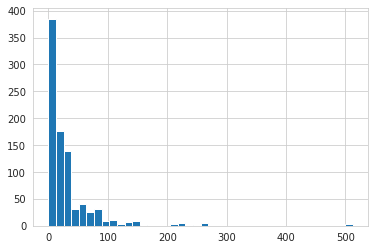

In [20]:
titanic['Fare'].hist(bins=40)

### Data Cleaning

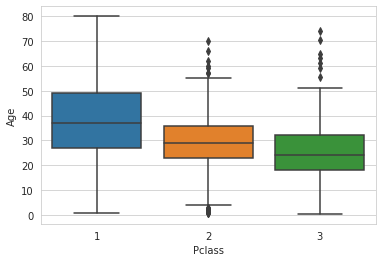

In [21]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [22]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else: 
            return 24
    else:
        return Age

In [23]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)

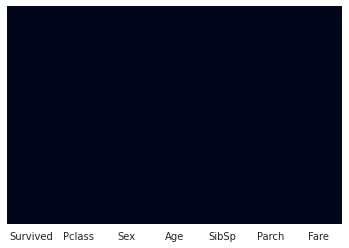

In [24]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In [25]:
print(titanic.isnull().sum())
print('shape of train data: ',titanic.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64
shape of train data:  (891, 7)


### Converting Categorical Features

Now we need to convert categorical features into dummy variables using pandas.

In [26]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)

In [27]:
titanic.drop('Sex',axis=1,inplace=True)

In [28]:
titanic=pd.concat([titanic,sex],axis=1)

In [29]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [30]:
print('Shape of the data:',titanic.shape)

Shape of the data: (891, 7)


In [31]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [32]:
X

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
888,3,24.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
print('shape of X:',X)
print('shape of y:',y)

shape of X:      Pclass   Age  SibSp  Parch     Fare  male
0         3  22.0      1      0   7.2500     1
1         1  38.0      1      0  71.2833     0
2         3  26.0      0      0   7.9250     0
3         1  35.0      1      0  53.1000     0
4         3  35.0      0      0   8.0500     1
..      ...   ...    ...    ...      ...   ...
886       2  27.0      0      0  13.0000     1
887       1  19.0      0      0  30.0000     0
888       3  24.0      1      2  23.4500     0
889       1  26.0      0      0  30.0000     1
890       3  32.0      0      0   7.7500     1

[891 rows x 6 columns]
shape of y: 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


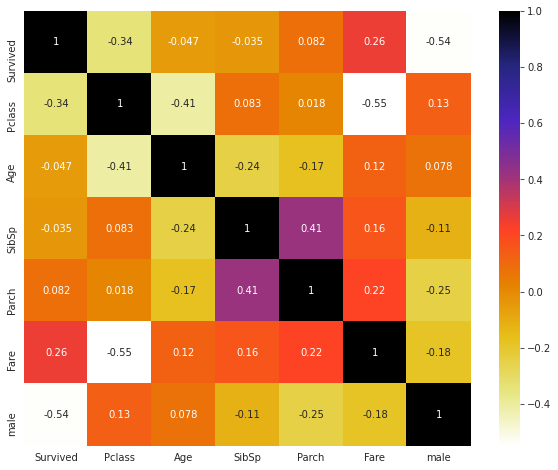

In [35]:
# Pearson Correlation
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

There is not much correlation among the independent features. So, we can proceed with the existing features.

### Building the model

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=355)

In [38]:
# Let's first visualize the tree on the data without doing any preprocessing
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
feature_name=list(X_train.columns)
class_name=list(y_train.unique())
print(feature_name)
print(class_name)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']
[1, 0]


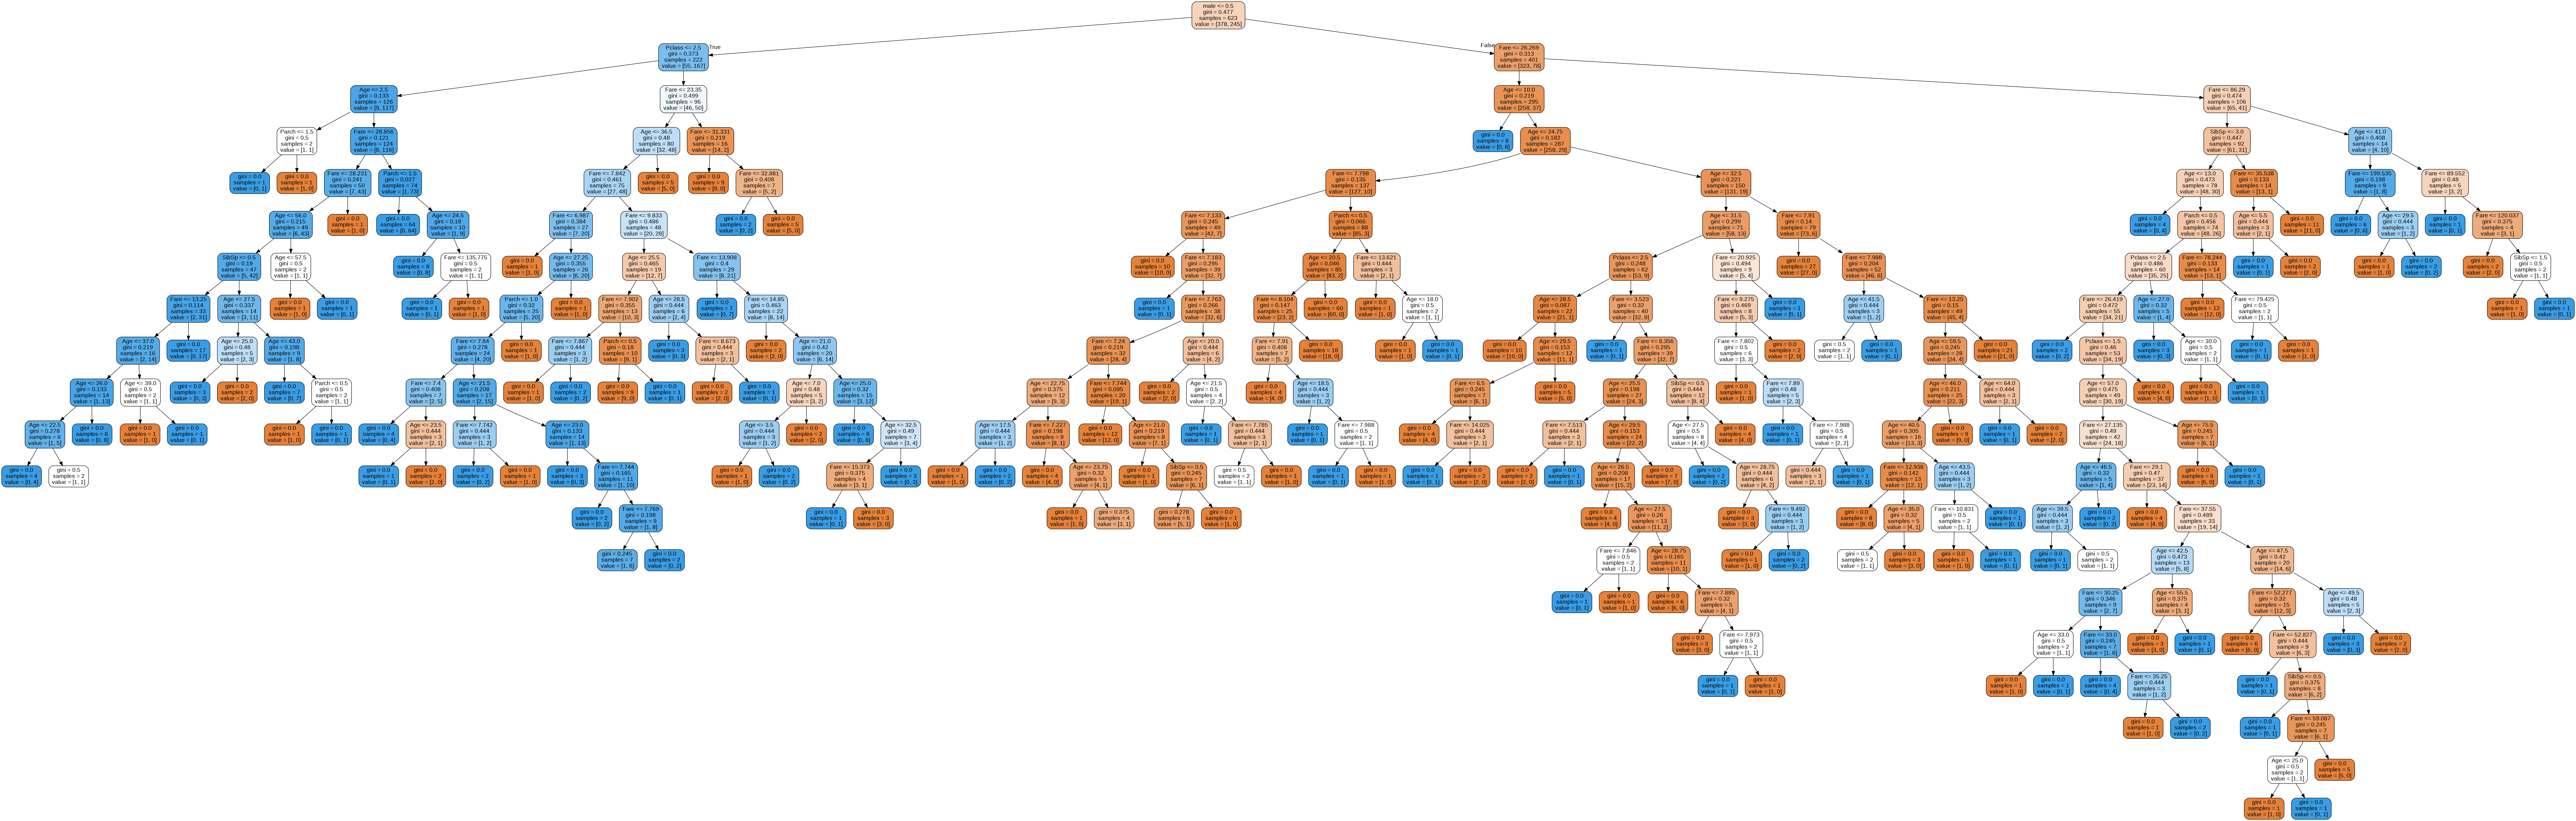

In [40]:
# Create a dot file which stores the tree structure
dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
# Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('mytree.png')
#show graph
Image(graph.create_png())

In [41]:
# Accuracy of our classification tree on training data
clf.score(X_train,y_train)

0.985553772070626

In [42]:
# Accuracy of our classification tree on testing data
clf.score(X_test,y_test)

0.75

In [43]:
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [44]:
# Accuracy score on training & testing data
Accuracy_score_train=accuracy_score(y_train,y_train_pred)
print('Accuracy score on training data:',Accuracy_score_train)

Accuracy score on training data: 0.985553772070626


In [45]:
Accuracy_score_test=accuracy_score(y_test,y_test_pred)
print('Accuracy score on testing data:',Accuracy_score_test)

Accuracy score on testing data: 0.75


In [46]:
print(classification_report(y_test,y_test_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       171
           1       0.63      0.74      0.68        97

    accuracy                           0.75       268
   macro avg       0.73      0.75      0.74       268
weighted avg       0.76      0.75      0.75       268



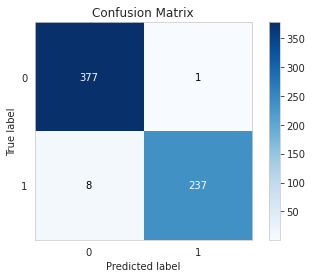

In [47]:
# Plotting the confusion matrix on y_train, y_train_pred
skplt.plot_confusion_matrix(y_train ,y_train_pred)
plt.show()

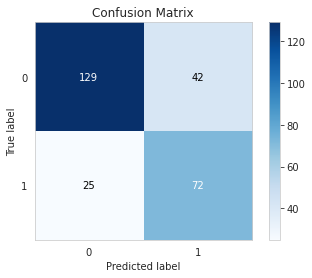

In [48]:
# Plotting the confusion matrix on y_test, y_test_pred
skplt.plot_confusion_matrix(y_test ,y_test_pred)
plt.show()

### Standardizing the features before hyper parameter tuning

In [49]:
scalar=StandardScaler()
X_transform=scalar.fit_transform(X)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.30, random_state= 355)

### Using PCA for feature selection 

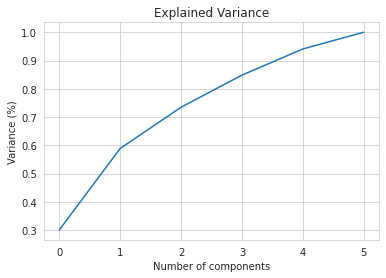

In [51]:
pca=PCA()
PrincipalComponents=pca.fit_transform(X_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Explained Variance')
plt.show()

We can see that morethan 95% of the variance is being explained by 5 components.
So instead of giving all 6 columns as input in our algorithm let's use these 5 principal components instead.

In [52]:
pca=PCA(n_components=5)
new_data=pca.fit_transform(X_transform)
principal_X=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [53]:
principal_X

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-1.186586,0.458355,0.579065,0.284109,-0.358106
1,1.889875,-0.704002,-0.745372,0.112088,-1.019341
2,-0.601888,0.285849,-1.591132,-0.058536,-0.311672
3,1.617648,-0.560689,-0.837596,0.113575,-1.032969
4,-1.177517,-0.545217,0.300918,-0.323609,0.100799
...,...,...,...,...,...
886,-0.580358,-0.678690,0.310160,0.350409,0.161537
887,0.882515,-0.360395,-1.451139,0.900046,-0.270710
888,0.577174,2.044472,-0.872957,-1.038250,0.731296
889,0.274491,-1.110257,0.423358,0.744964,0.167046


In [54]:
# let's see how well our model perform on this new data
X_train,X_test,y_train,y_test = train_test_split(principal_X,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7649253731343284

Our accuracy score got reduced slightly after doing PCA. This is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature has large variance as important features, but the feature has large variance can have nothing to do with the prediction target.

This means, we created lot of useless features and eliminate useful features after PCA.

### Hyper parameter tuning for increasing the accuracy of model

In [55]:
# Tuning the hyperparameters
grid_param={'criterion':['gini','entropy'],'max_depth':range(2,30,1),'min_samples_leaf':range(1,10,1),'min_samples_split': range(2,30,1),
    'splitter' : ['best', 'random']}

In [56]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [57]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 29, 'splitter': 'random'}


In [58]:
grid_search.best_score_

0.8170193548387097

In [67]:
clf2=DecisionTreeClassifier(criterion= 'gini', max_depth= 24, min_samples_leaf= 1, min_samples_split= 29, splitter= 'random')
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=29,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [68]:
# Accuracy of our classification tree 
clf2.score(X_test,y_test)

0.7723880597014925

After hyper parameter tuning, we improved the model accuracy.

In [69]:
# Let's save the model
import pickle
# Writing different model files to file
with open( 'modelForPrediction_DecisionTree.sav', 'wb') as f:
    pickle.dump(clf2,f)